# Introdução à Agronomia com Python e dados (MC 5)

06/01/2021 - 22/01/2021. 

Segundas, Quartas e Sextas das 18:00 as 19:30

### Professor: Lucas Mielke.
### Contato: lucas.mielke@usp.br

## 2. Agricultura e alimentação:

## Tópico 2.1. População mundial e Produção de Alimentos

O mundo está superpovoado? Fome ocorre pela falta de produção de alimentos?

Teorias demográficas - Malthusianos, neomalthusianos e reformistas https://educacao.uol.com.br/disciplinas/geografia/teorias-demograficas-malthusianos-neomalthusianos-e-reformistas.htm?cmpid=copiaecola

Malthusianos - Produção de alimentos cresce em PA (Progressão Aritmética). População Cresce em Progressão Geométrica.

Neomalthusianos - Necessidade de aplicar controle de natalidade.

Reformistas - Desenvolvimento econômico terá o controle de natalidade como uma das consequências.

In [1]:
#Progressão aritmética
Tempo_em_anos = list(range(0, 5))
PA = []
a = 1
for a in Tempo_em_anos:
    PA.append(a)
    a+1

In [2]:
#Progressão geométrica
Tempo_em_anos = list(range(0, 5))
PG = []
a = 0
for a in Tempo_em_anos:
    PG.append(2**a)
    a+1

In [3]:
import matplotlib.pyplot as plt
plt.plot(Tempo_em_anos,PA,label="PA")
plt.plot(Tempo_em_anos,PG,label="PG")
plt.legend()

## Analisando a população mundial

In [4]:
import pandas as pd

path = "FAOSTAT\Population_E_All_Data_(Normalized)\Population_E_All_Data_(Normalized).csv"
populacao = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")
populacao.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.118,X,NaN
1,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,7840.156,X,NaN
2,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,7935.997,X,NaN
3,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,8039.694,X,NaN
4,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,8151.317,X,NaN


### Rápida análise da base de dados

In [5]:
print(populacao["Item"].unique())

['Population - Est. & Proj.']


In [6]:
print(populacao["Element"].unique())

['Total Population - Both sexes' 'Total Population - Male'
 'Total Population - Female' 'Rural population' 'Urban population']


In [7]:
populacao.groupby("Element").count()

,Area Code,Area,Item Code,Item,Element Code,Year Code,Year,Unit,Value,Flag,Note
Element,,,,,,,,,,,
Rural population,25811,25811,25811,25811,25811,25811,25811,25811,25811,25811,0
Total Population - Both sexes,39441,39441,39441,39441,39441,39441,39441,39441,39441,39441,0
Total Population - Female,34674,34674,34674,34674,34674,34674,34674,34674,34674,34674,0
Total Population - Male,34674,34674,34674,34674,34674,34674,34674,34674,34674,34674,0
Urban population,25811,25811,25811,25811,25811,25811,25811,25811,25811,25811,0


In [8]:
populacao_edit = populacao[populacao["Element"]=="Total Population - Both sexes"]
populacao_edit = populacao_edit[populacao_edit["Area"]=="World"]
#populacao_edit = populacao_edit[populacao_edit["Year"]==2019]


In [9]:
populacao_edit.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
138351,5000,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,2536431.149,A,NaN
138352,5000,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,2584034.261,A,NaN
138353,5000,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,2630861.562,A,NaN
138354,5000,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,2677608.960,A,NaN
138355,5000,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,2724846.741,A,NaN


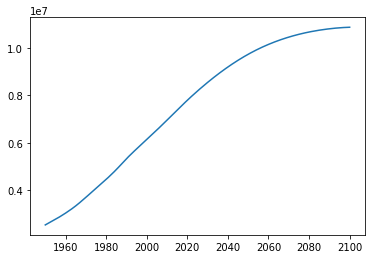

In [10]:
import numpy as np
x_pop = np.array(populacao_edit["Year"])
y_pop = np.array(populacao_edit["Value"])
plt.plot(x_pop,y_pop)

In [11]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
#populacao_edit = pd.pivot_table(populacao_edit, index="Year",  columns="Area", aggfunc="sum",values="Value").reset_index()
#populacao_edit.head()

In [12]:
#import numpy as np
#x = np.array(populacao_edit["Year"])
#y = np.array(populacao_edit["World"])
#plt.plot(x,y)

In [14]:
import pandas as pd

path = "FAOSTAT\Production_Crops_E_All_Data_(Normalized)\Production_Crops_E_All_Data_(Normalized).csv"
prod = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")
prod = prod[prod["Item"]=="Rubber, natural"]
prod = prod[prod["Element"]=="Production"]
prod = prod[prod["Year"]==2019]
prod = prod.sort_values(by=['Value'],ascending=False)

prod

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1828883,5000,World,836,"Rubber, natural",5510,Production,2019,2019,tonnes,14616614.0,A
2083178,5300,Asia,836,"Rubber, natural",5510,Production,2019,2019,tonnes,12924160.0,A
2159047,5304,South-eastern Asia,836,"Rubber, natural",5510,Production,2019,2019,tonnes,10985296.0,A
1587360,216,Thailand,836,"Rubber, natural",5510,Production,2019,2019,tonnes,4839952.0,NaN
786837,101,Indonesia,836,"Rubber, natural",5510,Production,2019,2019,tonnes,3448782.0,NaN
2478644,5815,Low Income Food Deficit Countries,836,"Rubber, natural",5510,Production,2019,2019,tonnes,3028532.0,A
2506106,5817,Net Food Importing Developing Countries,836,"Rubber, natural",5510,Production,2019,2019,tonnes,1300381.0,A
1765590,237,Viet Nam,836,"Rubber, natural",5510,Production,2019,2019,tonnes,1185157.0,NaN
2139134,5303,Southern Asia,836,"Rubber, natural",5510,Production,2019,2019,tonnes,1098955.0,A
773854,100,India,836,"Rubber, natural",5510,Production,2019,2019,tonnes,1001405.0,Im


In [6]:
print(prod["Item"].unique())

['Almonds, with shell' 'Anise, badian, fennel, coriander' 'Apples'
 'Apricots' 'Barley' 'Berries nes' 'Figs' 'Fruit, citrus nes'
 'Fruit, fresh nes' 'Fruit, stone nes' 'Grapes' 'Linseed' 'Maize'
 'Melons, other (inc.cantaloupes)' 'Millet' 'Nuts nes' 'Olives'
 'Onions, dry' 'Oranges' 'Peaches and nectarines' 'Pears' 'Pistachios'
 'Plums and sloes' 'Potatoes' 'Pulses nes' 'Rice, paddy'
 'Rice, paddy (rice milled equivalent)' 'Seed cotton' 'Sesame seed'
 'Spices nes' 'Sugar beet' 'Sugar cane' 'Sunflower seed'
 'Vegetables, fresh nes' 'Walnuts, with shell' 'Watermelons' 'Wheat'
 'Cereals, Total' 'Citrus Fruit, Total' 'Fibre Crops Primary'
 'Fruit Primary' 'Oilcrops' 'Oilcrops, Cake Equivalent'
 'Oilcrops, Oil Equivalent' 'Pulses, Total' 'Roots and Tubers, Total'
 'Sugar Crops Primary' 'Treenuts, Total' 'Vegetables Primary' 'Beans, dry'
 'Beans, green' 'Broad beans, horse beans, dry'
 'Cabbages and other brassicas' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cherries' 'Cherries, sou

In [15]:
print(prod["Unit"].unique())

['ha' 'hg/ha' 'tonnes']


In [16]:
print(prod["Element"].unique())

['Area harvested' 'Yield' 'Production']


In [17]:
prod_edit = prod[prod["Element"]=="Production"]
prod_edit = prod_edit[prod_edit["Area"]=="World"]
prod_edit = prod_edit[prod_edit["Item"]=="Cereals, Total"] 
prod_edit.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1834805,5000,World,1717,"Cereals, Total",5510,Production,1961,1961,tonnes,8.768745e+08,A
1834806,5000,World,1717,"Cereals, Total",5510,Production,1962,1962,tonnes,9.333730e+08,A
1834807,5000,World,1717,"Cereals, Total",5510,Production,1963,1963,tonnes,9.493459e+08,A
1834808,5000,World,1717,"Cereals, Total",5510,Production,1964,1964,tonnes,1.001214e+09,A
1834809,5000,World,1717,"Cereals, Total",5510,Production,1965,1965,tonnes,9.985930e+08,A


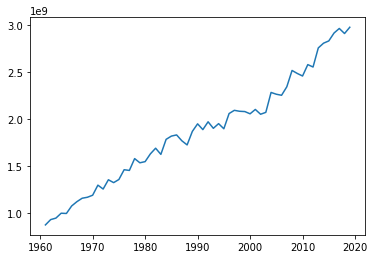

In [18]:
import numpy as np
x_prod = np.array(prod_edit["Year"])
y_prod = np.array(prod_edit["Value"])
plt.plot(x_prod,y_prod)

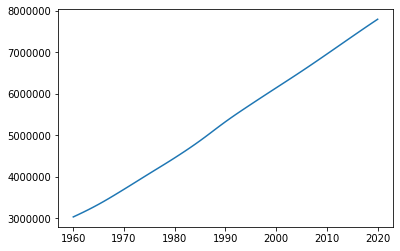

In [19]:
populacao_edit = populacao_edit[populacao_edit["Year"]<2021]
populacao_edit = populacao_edit[populacao_edit["Year"]>1959]
x_pop = np.array(populacao_edit["Year"])
y_pop = np.array(populacao_edit["Value"])
plt.plot(x_pop,y_pop)

In [20]:
#Aumento produção grãos médio
(1.2*10**9-0.2*10**9)/60

16666666.666666666

In [21]:
#Aumento populacional anual médio
(8*10**9-3*10**9)/60

83333333.33333333

### Revolução Verde
https://pt.wikipedia.org/wiki/Revolu%C3%A7%C3%A3o_verde#:~:text=A%20express%C3%A3o%20Revolu%C3%A7%C3%A3o%20Verde%20refere,d%C3%A9cadas%20seguintes%2C%20em%20outros%20pa%C3%ADses.

### Merge data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [22]:
pop_prod = prod_edit.merge(populacao_edit, how='inner', left_on=['Year'], right_on=['Year'], copy=False, validate='one_to_one', suffixes=('_prod', '_pop'))
pop_prod.head()

,Area Code_prod,Area_prod,Item Code_prod,Item_prod,Element Code_prod,Element_prod,Year Code_prod,Year,Unit_prod,Value_prod,...,Area_pop,Item Code_pop,Item_pop,Element Code_pop,Element_pop,Year Code_pop,Unit_pop,Value_pop,Flag_pop,Note
0,5000,World,1717,"Cereals, Total",5510,Production,1961,1961,tonnes,8.768745e+08,...,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1961,1000 persons,3091843.507,A,NaN
1,5000,World,1717,"Cereals, Total",5510,Production,1962,1962,tonnes,9.333730e+08,...,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1962,1000 persons,3150420.795,A,NaN
2,5000,World,1717,"Cereals, Total",5510,Production,1963,1963,tonnes,9.493459e+08,...,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1963,1000 persons,3211001.009,A,NaN
3,5000,World,1717,"Cereals, Total",5510,Production,1964,1964,tonnes,1.001214e+09,...,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1964,1000 persons,3273978.338,A,NaN
4,5000,World,1717,"Cereals, Total",5510,Production,1965,1965,tonnes,9.985930e+08,...,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1965,1000 persons,3339583.597,A,NaN


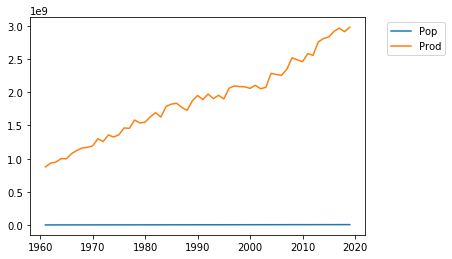

In [23]:
x = np.array(pop_prod["Year"])
y_pop = np.array(pop_prod["Value_pop"])
y_prod = np.array(pop_prod["Value_prod"])
plt.plot(x,y_pop,label="Pop")
plt.plot(x,y_prod,label="Prod")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

In [24]:
print("População x1000 pessoas - minima",pop_prod["Value_pop"].min())
print("Producao toneladas - minima ",pop_prod["Value_prod"].min())

População x1000 pessoas - minima 3091843.507
Producao toneladas - minima  876874525.0


In [25]:
pop_prod["Value_pop"]=pop_prod["Value_pop"]/pop_prod["Value_pop"].min()
pop_prod["Value_prod"]=pop_prod["Value_prod"]/pop_prod["Value_prod"].min()

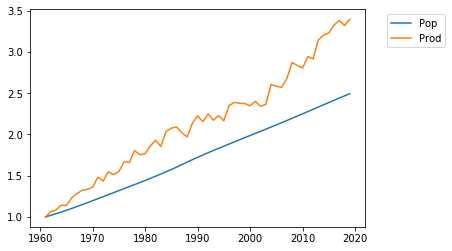

In [26]:
x = np.array(pop_prod["Year"])
y_pop = np.array(pop_prod["Value_pop"])
y_prod = np.array(pop_prod["Value_prod"])
plt.plot(x,y_pop,label="Pop")
plt.plot(x,y_prod,label="Prod")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

### Conclusão: A produção de alimentos foi proporcionalmente superior ao crescimento populacional
### Discussões adicionais - Sustentabilidade, Distribuição

In [27]:
prod_edit = prod[prod["Element"]=="Area harvested"]
prod_edit = prod_edit[prod_edit["Area"]=="World"]
prod_edit = prod_edit[prod_edit["Item"]=="Cereals, Total"]
prod_edit.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1834687,5000,World,1717,"Cereals, Total",5312,Area harvested,1961,1961,ha,647997186.0,A
1834688,5000,World,1717,"Cereals, Total",5312,Area harvested,1962,1962,ha,653839500.0,A
1834689,5000,World,1717,"Cereals, Total",5312,Area harvested,1963,1963,ha,659234467.0,A


In [28]:
pop_prod = prod_edit.merge(populacao_edit, how='inner', left_on='Year', right_on='Year', copy=False, validate='one_to_one', suffixes=('_prod', '_pop'))

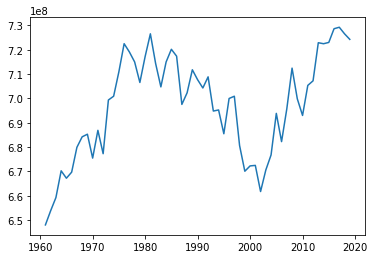

In [29]:
import numpy as np
x_prod = np.array(prod_edit["Year"])
y_prod = np.array(prod_edit["Value"])
plt.plot(x_prod,y_prod)

In [30]:
print("População x1000 pessoas - minima",pop_prod["Value_pop"].min())
print("Producao hectares - minima ",pop_prod["Value_prod"].min())

População x1000 pessoas - minima 3091843.507
Producao hectares - minima  647997186.0


In [31]:
pop_prod["Value_pop"]=pop_prod["Value_pop"]/pop_prod["Value_pop"].min()
pop_prod["Value_prod"]=pop_prod["Value_prod"]/pop_prod["Value_prod"].min()

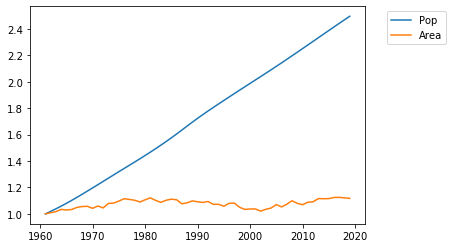

In [32]:
x = np.array(pop_prod["Year"])
y_pop = np.array(pop_prod["Value_pop"])
y_prod = np.array(pop_prod["Value_prod"])
plt.plot(x,y_pop,label="Pop")
plt.plot(x,y_prod,label="Area")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

In [33]:
def filtro_producao(a="Yield",b="World",c="Cereals, Total",d=1960):    
    df = prod[prod["Element"]==a]
    df = df[df["Area"]==b]
    df = df[df["Item"]==c]
    df = df[df["Year"]>d]
    return df

In [34]:
prod_edit = filtro_producao()
prod_edit.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1834746,5000,World,1717,"Cereals, Total",5419,Yield,1961,1961,hg/ha,13532.0,Fc
1834747,5000,World,1717,"Cereals, Total",5419,Yield,1962,1962,hg/ha,14275.0,Fc


hg = hectograma = 100 gramas

In [35]:
prod_edit["Value"]=prod_edit["Value"]/10

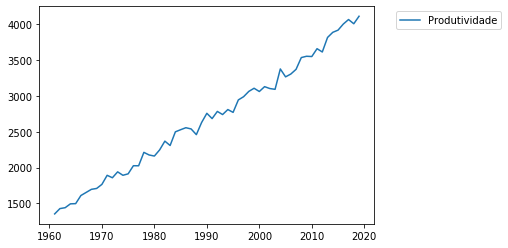

In [36]:
x = np.array(prod_edit["Year"])
y = np.array(prod_edit["Value"])

plt.plot(x,y,label="Produtividade")

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

In [37]:
def grafico_producao(a="Yield",b="World",c="Cereals, Total"):    #filtro
    df = prod[prod["Element"]==a] #filtro
    df = df[df["Area"]==b] #filtro
    df = df[df["Item"]==c] #filtro
    
    x = np.array(df["Year"]) #filtro
    y = np.array(df["Value"]) #filtro

    plt.plot(x,y,label=a+"-"+b+"-"+c) #Fazer legenda bacana

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) #plotar legenda

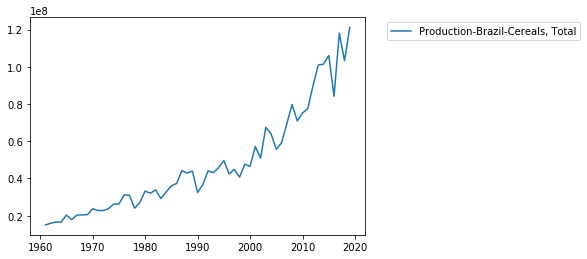

In [38]:
grafico_producao(a="Production",b="Brazil")

In [39]:
def grafico_producao_relativa(a="Yield",b="World",c="Cereals, Total"):    #filtro
    df = prod[prod["Element"]==a] #filtro
    df = df[df["Area"]==b] #filtro
    df = df[df["Item"]==c] #filtro
    
    df["Value"]=df["Value"]/df["Value"].min() #Normalizando
    
    x = np.array(df["Year"]) #filtro
    y = np.array(df["Value"]) #filtro

    plt.plot(x,y,label=a+"-"+b+"-"+c) #Fazer legenda bacana

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) #plotar legenda

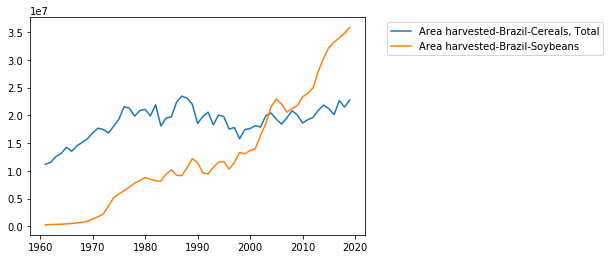

In [40]:
grafico_producao(a="Area harvested",b="Brazil")
grafico_producao(a="Area harvested",b="Brazil",c="Soybeans")

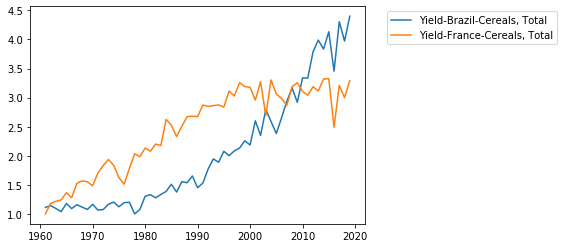

In [41]:
grafico_producao_relativa(a="Yield",b="Brazil")
grafico_producao_relativa(a="Yield",b="France")

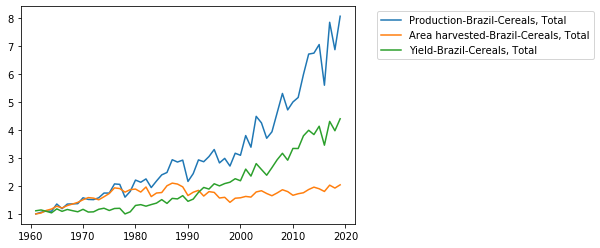

In [42]:
grafico_producao_relativa(a="Production",b="Brazil")
grafico_producao_relativa(a="Area harvested",b="Brazil")
grafico_producao_relativa(a="Yield",b="Brazil")

#### Brazil De 1960 para cá, a área +-estável, produtividade 6x, producao 5x

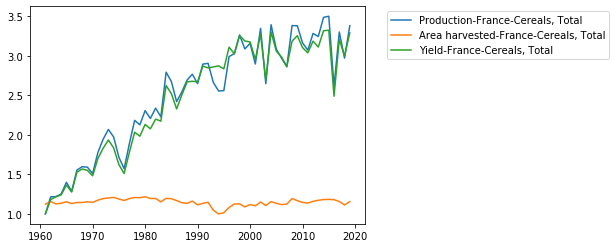

In [43]:
grafico_producao_relativa(a="Production",b="France")
grafico_producao_relativa(a="Area harvested",b="France")
grafico_producao_relativa(a="Yield",b="France")

UsageError: Line magic function `%grafico_producao_relativa(a="Yield",b="Brazil")` not found.


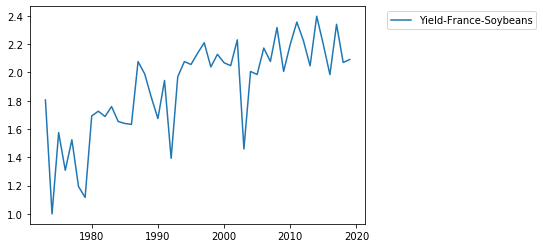

In [44]:
grafico_producao_relativa(a="Yield",b="France",c="Soybeans")
%grafico_producao_relativa(a="Yield",b="Brazil")

In [45]:
def grafico_producao(a="Yield",b="World"):    #filtro
    df = prod[prod["Element"]==a] #filtro
    df = df[df["Area"]==b] #filtro
    df=df.groupby("Year").sum().reset_index()
    
    #print(df)
    
    x = np.array(df["Year"]) #filtro
    y = np.array(df["Value"]) #filtro

    plt.plot(x,y,label=a+"-"+b) #Fazer legenda bacana

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) #plotar legenda

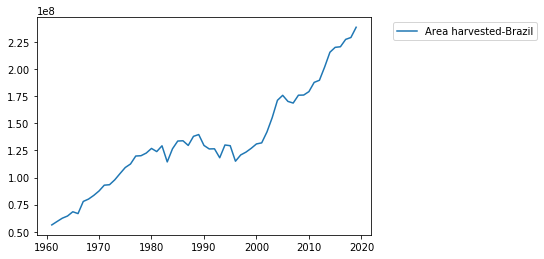

In [46]:
grafico_producao(a="Area harvested",b="Brazil")
#Colhemos 280 milhoes de hectares?

## Tópico 2.2. População urbana x população mundial

In [47]:
populacao.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.118,X,NaN
1,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,7840.156,X,NaN
2,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,7935.997,X,NaN
3,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,8039.694,X,NaN
4,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,8151.317,X,NaN


In [48]:
populacao
populacao["Element"].unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

In [49]:
def grafico_populacao(a="Total Population - Both sexes",b="World"):    #filtro
    df = populacao[populacao["Element"]==a] #filtro
    df = df[df["Area"]==b] #filtro
    
    df["Value"]=df["Value"]/df["Value"].min() #Normalizando
    
    x = np.array(df["Year"]) #filtro
    y = np.array(df["Value"]) #filtro

    plt.plot(x,y,label=a+"-"+b) #Fazer legenda bacana

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) #plotar legenda

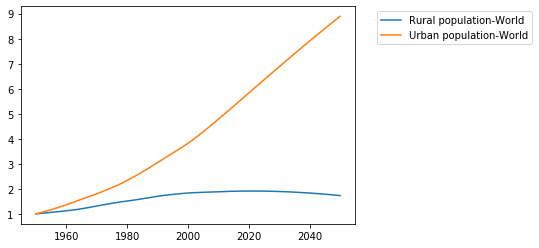

In [50]:
grafico_populacao(a="Rural population")
grafico_populacao(a="Urban population")

In [51]:
def pop_relativa_rural(b="World"):
    df = populacao[(populacao["Element"]=="Urban population") | (populacao["Element"]=="Rural population")]
    df = df[df["Area"]==b] #filtro
    df = pd.pivot_table(df, index="Year",  columns="Element", aggfunc="sum",values="Value").reset_index()
    
    
    df["Percentual"]=(df["Rural population"]/(df["Rural population"]+df["Urban population"]))*100
    
    x = np.array(df["Year"])
    y = np.array(df["Percentual"])
    plt.plot(x,y,label=b)
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

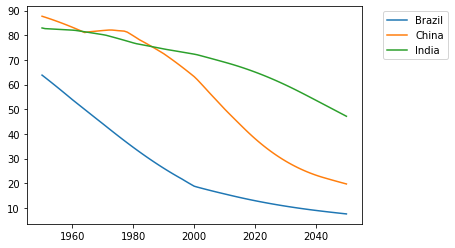

In [52]:
pop_relativa_rural("Brazil")
#pop_relativa_rural("France")
pop_relativa_rural("China")
pop_relativa_rural("India")

### Nota: Não há correlação entre desenvolvimento humano e população rural

# Exercícios

# 1

Explore a base de uso de terra (land use) e veja os dados do Brasil para 2018. Gere uma tabela com esses dados.

P.S. Na aula vimos o uso de terra para cereais, não o uso total.

P.S.2 - O valor diverge por que há outras culturas (ex. árvores) e por que os cereais podem ser colhidos mais de uma vez no mesmo ano, superestimando o uso de terra.

leia também: https://ambientes.ambientebrasil.com.br/agropecuario/estrutura_fundiaria/uso_das_terras_no_brasil.html

In [53]:
path = "FAOSTAT\Inputs_LandUse_E_All_Data_(Normalized)\Inputs_LandUse_E_All_Data_(Normalized).csv"

In [54]:
#Escreva seu código aqui

In [55]:
##### Resposta 
import pandas as pd

terra = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")

terra.head(5)

terra_edit = terra[terra["Area"]=="Brazil"]

terra_edit = terra_edit[terra_edit["Year"]==2018]

terra_edit

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
18587,21,Brazil,6600,Country area,5110,Area,2018,2018,1000 ha,851577.0000,Fm
18645,21,Brazil,6601,Land area,5110,Area,2018,2018,1000 ha,835814.0000,Fm
18703,21,Brazil,6602,Agriculture,5110,Area,2018,2018,1000 ha,236878.8010,Fc
18761,21,Brazil,6610,Agricultural land,5110,Area,2018,2018,1000 ha,236878.8010,Fm
18819,21,Brazil,6620,Cropland,5110,Area,2018,2018,1000 ha,63518.0000,Fm
18877,21,Brazil,6621,Arable land,5110,Area,2018,2018,1000 ha,55762.0000,Fm
18935,21,Brazil,6650,Land under permanent crops,5110,Area,2018,2018,1000 ha,7756.0000,Fm
18993,21,Brazil,6655,Land under perm. meadows and pastures,5110,Area,2018,2018,1000 ha,173360.8010,Fm
19011,21,Brazil,6656,Perm. meadows & pastures - Cultivated,5110,Area,2018,2018,1000 ha,126037.4020,Fm
19029,21,Brazil,6659,Perm. meadows & pastures - Nat. growing,5110,Area,2018,2018,1000 ha,47323.3990,Fm


##### Complementação da resposta - Dica para fazer um gráfico de pizza: 
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

In [56]:
lista = [1,2,3]
lista[2]

3

835814.0


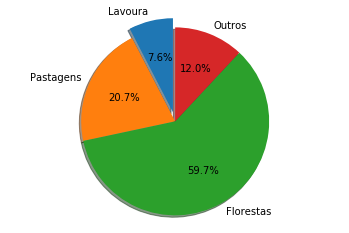

In [57]:
Lavoura = np.array(terra_edit[terra_edit["Item"]=="Cropland"]["Value"])[0]

Pastagens = np.array(terra_edit[terra_edit["Item"]=="Land under perm. meadows and pastures"]["Value"])[0]

Florestas = np.array(terra_edit[terra_edit["Item"]=="Forest land"]["Value"])[0]

Outros = np.array(terra_edit[terra_edit["Item"]=="Other land"]["Value"])[0]

Total = Lavoura + Pastagens + Florestas + Outros

print(Total) #Para saber a área toda

import matplotlib.pyplot as plt

labels = 'Lavoura', 'Pastagens', 'Florestas', 'Outros'

sizes = [Lavoura, Pastagens, Florestas, Outros]

explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Repetindo a pizza - anos 1990

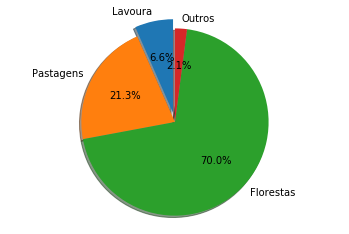

In [58]:
terra_edit = terra[terra["Area"]=="Brazil"]
terra_edit = terra_edit[terra_edit["Year"]==1991]

Lavoura = np.array(terra_edit[terra_edit["Item"]=="Cropland"]["Value"])[0]
Pastagens = np.array(terra_edit[terra_edit["Item"]=="Land under perm. meadows and pastures"]["Value"])[0]
Florestas = np.array(terra_edit[terra_edit["Item"]=="Forest land"]["Value"])[0]
Outros = np.array(terra_edit[terra_edit["Item"]=="Other land"]["Value"])[0]


#Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Lavoura', 'Pastagens', 'Florestas', 'Outros'
sizes = [Lavoura, Pastagens, Florestas, Outros]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 2
#### Faça um gráfico da evolução de uso de terra para lavouras anuais (Item = Cropland)
#### Você vai notar que a área é inferior ao que vimos nos gráficos anteriores, o motivo está aqui - https://boaspraticasagronomicas.com.br/boas-praticas/rotacao-de-culturas/

In [59]:
# Faça seu código aqui

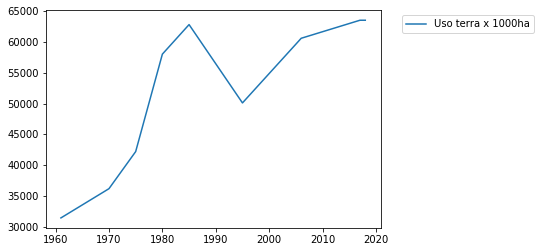

In [60]:
##### Resposta

terra_edit = terra[terra["Item"]=="Cropland"]

terra_edit = terra_edit[terra_edit["Area"]=="Brazil"]

terra_edit = terra_edit[terra_edit["Element"]=="Area"]

x = np.array(terra_edit["Year"])

y = np.array(terra_edit["Value"])

plt.plot(x,y,label="Uso terra x 1000ha")

plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

# 3
#### Compare o aumento de Item= Cropland e Item=Forest land do Brasil com o do mundo

In [61]:
# Faça seu código aqui

In [62]:
##### RESPOSTA

def terra_usada(a="Cropland", b="World", c=1960):

    df = terra[terra["Item"]==a]

    df = df[df["Area"]==b]

    df = df[df["Element"]=="Area"]

    df = df[df["Year"]>c]
    
    df["Value"]=df["Value"]/df["Value"].min() #Normalizando
    
    x = np.array(df["Year"])
    y = np.array(df["Value"])

    plt.plot(x,y,label="Uso terra - "+a+"-"+b)

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

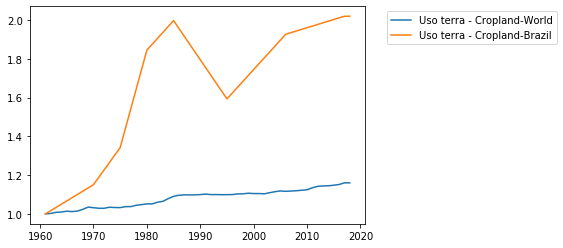

In [63]:
terra_usada()

terra_usada(b="Brazil")

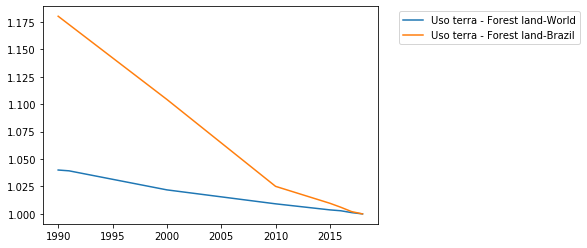

In [64]:
terra_usada(a="Forest land")

terra_usada(a="Forest land", b="Brazil")

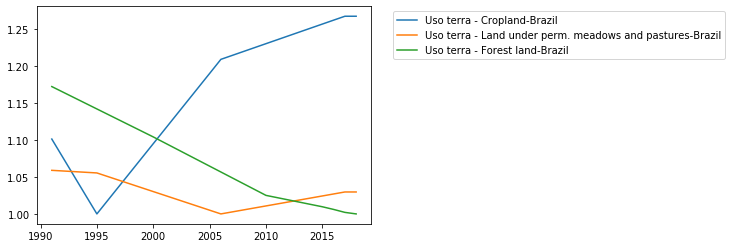

In [65]:
terra_usada(a="Cropland", b="Brazil",c=1990)

terra_usada(a="Land under perm. meadows and pastures", b="Brazil",c=1990)

terra_usada(a="Forest land", b="Brazil",c=1990)

## Tópico 2.2. Uso da terra, Fertilizantes e defensivos. Florestas, Poluição e Emissões de gás carbônico

### Uso da terra

In [66]:
path = "FAOSTAT\Inputs_LandUse_E_All_Data_(Normalized)\Inputs_LandUse_E_All_Data_(Normalized).csv"

import pandas as pd
import numpy as np

terra = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")
terra.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W


In [67]:
def uso_terra(a="Brazil",b=2018):
    terra_edit = terra[terra["Area"]==a]
    terra_edit = terra_edit[terra_edit["Year"]==b]
    
    Lavoura = np.array(terra_edit[terra_edit["Item"]=="Cropland"]["Value"])[0]
    Pastagens = np.array(terra_edit[terra_edit["Item"]=="Land under perm. meadows and pastures"]["Value"])[0]
    Florestas = np.array(terra_edit[terra_edit["Item"]=="Forest land"]["Value"])[0]
    Outros = np.array(terra_edit[terra_edit["Item"]=="Other land"]["Value"])[0]
    
    return Lavoura,Pastagens,Florestas,Outros    

In [68]:
uso_terra()

(63518.0, 173360.801, 499051.4, 99883.799)

In [69]:
def pizza(rotulos=('Lavoura', 'Pastagens', 'Florestas', 'Outros'),valores=uso_terra()):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = rotulos
    sizes = valores
    explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

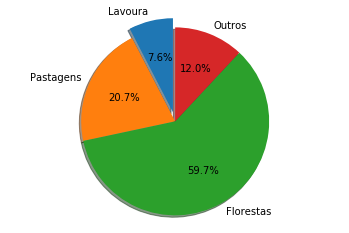

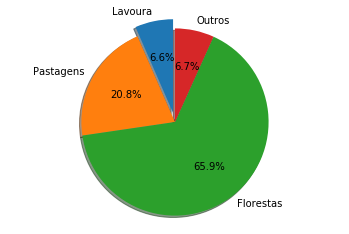

In [70]:
pizza()
pizza(valores=uso_terra(b=2000))

In [71]:
def terra_usada(a="Cropland", b="World", c=1960, d=1):
    df = terra[terra["Item"]==a]
    df = df[df["Area"]==b]
    df = df[df["Element"]=="Area"]
    df = df[df["Year"]>c]
    
    if d==1: #Vamos condicionar a normalização
        df["Value"]=df["Value"]/df["Value"].min() 
        
    x = np.array(df["Year"])
    y = np.array(df["Value"])

    plt.plot(x,y,label="Uso terra - "+a+"-"+b)

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

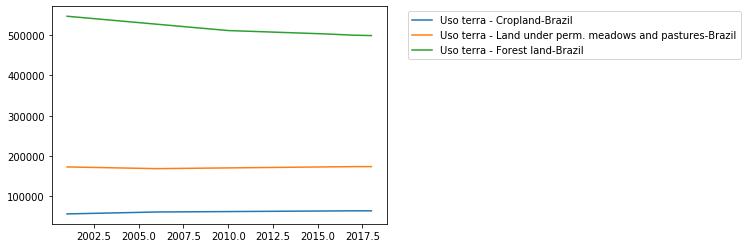

In [72]:
normalizado=0
terra_usada(a="Cropland", b="Brazil",c=2000,d=normalizado)
terra_usada(a="Land under perm. meadows and pastures", b="Brazil",c=2000,d=normalizado)
terra_usada(a="Forest land", b="Brazil",c=2000,d=normalizado)

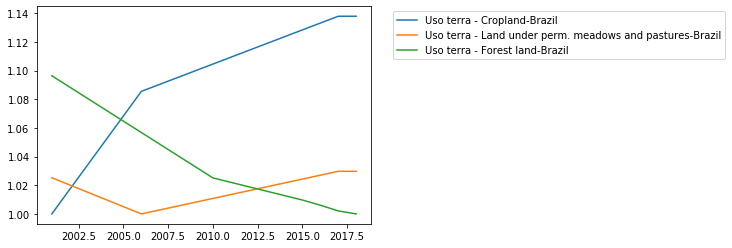

In [73]:
normalizado=1
terra_usada(a="Cropland", b="Brazil",c=2000,d=normalizado)
terra_usada(a="Land under perm. meadows and pastures", b="Brazil",c=2000,d=normalizado)
terra_usada(a="Forest land", b="Brazil",c=2000,d=normalizado)

### Fertilizantes

In [74]:
path = "FAOSTAT\Inputs_FertilizersNutrient_E_All_Data_(Normalized)\Inputs_FertilizersNutrient_E_All_Data_(Normalized).csv"

import pandas as pd
import numpy as np

fert = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")
fert.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1974,1974,tonnes,19117.0,Qm
1,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1975,1975,tonnes,14774.0,Qm


In [75]:
fert.Element.unique()

array(['Production', 'Import Quantity', 'Export Quantity',
       'Agricultural Use'], dtype=object)

In [76]:
fert =  fert[fert["Element"]=="Agricultural Use"]

In [77]:
#Vários tipos de fertilizante
fert.Item.unique()

array(['Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
       'Nutrient potash K2O (total)'], dtype=object)

NPK - MACRONUTRIENTES

https://pt.wikipedia.org/wiki/Nauru

### Merge produção e fertilizantes

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [78]:
fert =  fert.groupby(["Year","Area"])["Value"].sum().reset_index()
fert

,Year,Area,Value
0,1961,Afghanistan,1.100000e+03
1,1961,Africa,7.041770e+05
2,1961,Albania,6.302000e+03
3,1961,Algeria,4.900000e+04
4,1961,Americas,8.830771e+06
...,...,...,...
10327,2018,Western Europe,5.872587e+06
10328,2018,World,1.881600e+08
10329,2018,Yemen,4.207080e+03
10330,2018,Zambia,1.995415e+05


In [79]:
prod_edit = prod[prod["Element"]=="Production"]
prod_edit = prod_edit.groupby(["Year","Area"])['Value'].sum().reset_index()
prod_edit

,Year,Area,Value
0,1961,Afghanistan,1.009655e+07
1,1961,Africa,3.905735e+08
2,1961,Albania,1.452690e+06
3,1961,Algeria,8.994504e+06
4,1961,Americas,1.355215e+09
...,...,...,...
13196,2019,Western Europe,5.698403e+08
13197,2019,World,1.996020e+10
13198,2019,Yemen,5.287494e+06
13199,2019,Zambia,2.569525e+07


In [80]:
fert_prod = prod_edit.merge(fert, how='inner', left_on=['Year','Area'], right_on=['Year','Area'], copy=False, validate='one_to_one', suffixes=('_prod', '_fert'))
fert_prod.head()

,Year,Area,Value_prod,Value_fert
0,1961,Afghanistan,1.009655e+07,1100.00
1,1961,Africa,3.905735e+08,704177.00
2,1961,Albania,1.452690e+06,6302.00
3,1961,Algeria,8.994504e+06,49000.00
4,1961,Americas,1.355215e+09,8830770.65


In [81]:
def fert_pais(a="Brazil"):
    df = fert_prod[fert_prod["Area"]==a]
    
    x = np.array(df["Year"])
    y_prod = np.array(df["Value_prod"]/100)
    y_fert = np.array(df["Value_fert"])
    #print(df)
    plt.plot(x,y_prod,label="Producao dividido por 100 - "+a)
    plt.plot(x,y_fert,label="Fertilizante - "+a)
    
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

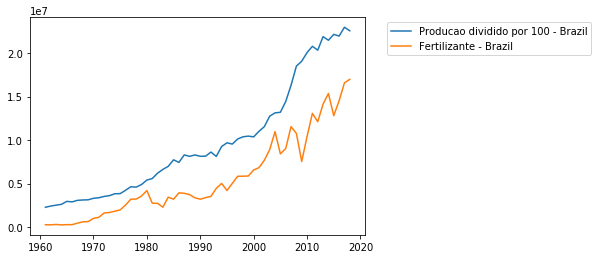

In [82]:
fert_pais('Brazil')

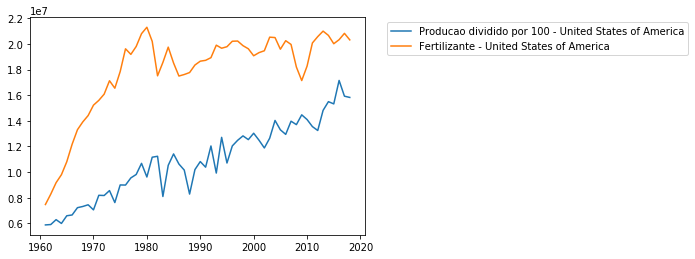

In [83]:
fert_pais('United States of America')

In [84]:
fert2018 = fert_prod[fert_prod["Year"]==2018]
fert2018

,Year,Area,Value_prod,Value_fert
10099,2018,Afghanistan,1.657528e+07,5.893316e+04
10100,2018,Africa,1.925052e+09,6.667360e+06
10101,2018,Albania,5.638313e+06,4.070652e+04
10102,2018,Algeria,5.239229e+07,1.557000e+05
10103,2018,Americas,5.430717e+09,5.094403e+07
...,...,...,...,...
10297,2018,Western Europe,5.333478e+08,5.872587e+06
10298,2018,World,1.968544e+10,1.881600e+08
10299,2018,Yemen,4.589397e+06,4.207080e+03
10300,2018,Zambia,2.621756e+07,1.995415e+05


In [85]:
fert2018.sort_values(by=['Value_fert'],ascending=False)

,Year,Area,Value_prod,Value_fert
10298,2018,World,1.968544e+10,1.881600e+08
10108,2018,Asia,9.909928e+09,1.038452e+08
10103,2018,Americas,5.430717e+09,5.094403e+07
10157,2018,Eastern Asia,3.949023e+09,4.858599e+07
10138,2018,China,3.805442e+09,4.698480e+07
...,...,...,...,...
10105,2018,Antigua and Barbuda,2.752700e+04,1.290000e+01
10215,2018,Micronesia,5.716590e+05,0.000000e+00
10140,2018,"China, Macao SAR",2.200000e+02,0.000000e+00
10261,2018,Singapore,5.401200e+04,0.000000e+00


https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [86]:
fert_prod["Razao fertilizante"] = fert_prod["Value_prod"]/fert_prod["Value_fert"]
fert_prod_2018 = fert_prod[fert_prod["Year"]==2018]
fert_prod_2018 = fert_prod_2018.loc[~(fert_prod_2018==0).any(axis=1)]

In [87]:
fert_prod_2018 = fert_prod_2018.sort_values(by=['Razao fertilizante'], ascending=False)
fert_prod_2018

,Year,Area,Value_prod,Value_fert,Razao fertilizante
10256,2018,Samoa,580897.0,36.45,15936.817558
10134,2018,Central African Republic,4899091.0,336.18,14572.821108
10152,2018,Democratic Republic of the Congo,115230427.0,14995.73,7684.215907
10144,2018,Congo,5792812.0,1292.68,4481.242071
10230,2018,Niger,27831255.0,6755.27,4119.932290
...,...,...,...,...,...
10236,2018,Norway,2585697.0,163710.00,15.794374
10228,2018,New Zealand,7911648.0,930589.44,8.501760
10139,2018,"China, Hong Kong SAR",81934.0,10721.73,7.641864
10188,2018,Ireland,4672814.0,696745.10,6.706633


In [88]:
fert_prod_2018[fert_prod_2018["Area"]=="Brazil"]

,Year,Area,Value_prod,Value_fert,Razao fertilizante
10125,2018,Brazil,2.257702e+09,16988368.15,132.896957


In [89]:
fert_prod_2018.drop(fert_prod_2018.loc[fert_prod_2018['Value_prod']>3000000].index, inplace=True)
fert_prod_2018.drop(fert_prod_2018.loc[fert_prod_2018['Value_fert']>100000].index, inplace=True)
fert_prod_2018.drop(fert_prod_2018.loc[fert_prod_2018['Razao fertilizante']>1000].index, inplace=True)

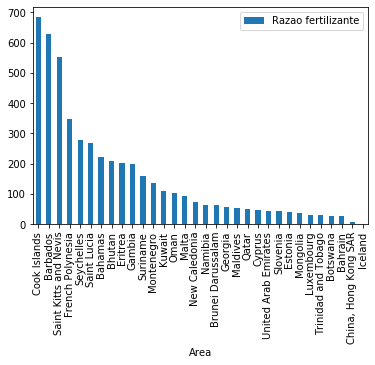

In [90]:
fert_prod_2018.plot(kind='bar',x='Area',y='Razao fertilizante')

### Defensivos agrícolas (ou Agrotóxicos)

SAF -  

In [91]:
path = "FAOSTAT\Inputs_Pesticides_Use_E_All_Data_(Normalized)\Inputs_Pesticides_Use_E_All_Data_(Normalized).csv"

import pandas as pd
import numpy as np

pest = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")
pest.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1990,1990,tonnes,121.0,A
1,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1991,1991,tonnes,121.0,A


In [92]:
pest =  pest[pest["Item"]=="Pesticides (total)"]
pest = pest.groupby(["Year","Area"])['Value'].sum().reset_index()

In [93]:
pest = fert_prod.merge(pest, how='inner', left_on=['Year','Area'], right_on=['Year','Area'], copy=False, validate='one_to_one', suffixes=('_pest', ''))

In [94]:
pest["Value_pest"] = pest["Value"]
pest = pest.drop(columns=['Value', 'Razao fertilizante'])
pest

,Year,Area,Value_prod,Value_fert,Value_pest
0,1990,Africa,8.278182e+08,3.583782e+06,65943.0
1,1990,Albania,3.605949e+06,1.020000e+05,121.0
2,1990,Algeria,1.095282e+07,1.270000e+05,5743.0
3,1990,Americas,2.907087e+09,2.862977e+07,613237.0
4,1990,Angola,6.704679e+06,9.500000e+03,64.0
...,...,...,...,...,...
5229,2018,Western Europe,5.333478e+08,5.872587e+06,153486.0
5230,2018,World,1.968544e+10,1.881600e+08,4122334.0
5231,2018,Yemen,4.589397e+06,4.207080e+03,110.0
5232,2018,Zambia,2.621756e+07,1.995415e+05,1670.0


### Regressão Linear multipla
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [95]:
X = np.array(pest.drop(columns=['Value_prod', 'Area', 'Year']))
y = np.array(pest["Value_prod"])

In [96]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.9667259178281322
[ 102.81941496 -578.5585427 ]
18964835.761334002


In [97]:
y_pred = reg.predict(X)

https://www.tutorialspoint.com/matplotlib/matplotlib_scatter_plot.htm#:~:text=Scatter%20plots%20are%20used%20to,the%20X%20and%20Y%20axes.

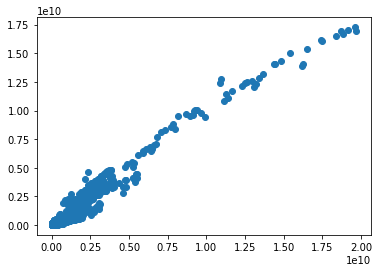

In [98]:
plt.scatter(y,y_pred)

### Poluição

In [99]:
import pandas as pd

path = "FAOSTAT\Emissions_Agriculture_Agriculture_total_E_All_Data_(Normalized)\Emissions_Agriculture_Agriculture_total_E_All_Data_(Normalized).csv"
poluicao = pd.read_csv(path,sep=",",decimal=".",encoding="latin1")
poluicao.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1961,1961,gigagrams,240.6831,A,NaN
1,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1962,1962,gigagrams,245.3106,A,NaN
2,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1963,1963,gigagrams,255.8285,A,NaN
3,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1964,1964,gigagrams,259.0650,A,NaN
4,2,Afghanistan,5058,Enteric Fermentation,7225,CH4 emissions,1965,1965,gigagrams,265.5980,A,NaN


In [100]:
poluicao["Element"].unique()

array(['CH4 emissions', 'Emissions (CO2eq)', 'Emissions (CO2eq) from CH4',
       'Emissions (CO2eq) from N2O', 'N2O emissions'], dtype=object)

In [101]:
poluicao =  poluicao[poluicao["Element"]=="Emissions (CO2eq)"]
poluicao = poluicao.groupby(["Year","Area"])['Value'].sum().reset_index()
poluicao

,Year,Area,Value
0,1961,Afghanistan,2.160918e+04
1,1961,Africa,5.618512e+05
2,1961,Albania,4.373061e+03
3,1961,Algeria,7.329383e+03
4,1961,American Samoa,8.961200e+00
...,...,...,...
14919,2050,Western Sahara,4.514346e+02
14920,2050,World,1.522628e+07
14921,2050,Yemen,2.766905e+04
14922,2050,Zambia,6.067334e+04


In [102]:
poluicao = pest.merge(poluicao, how='inner', left_on=['Year','Area'], right_on=['Year','Area'], copy=False, validate='one_to_one', suffixes=('_pest', ''))

In [103]:
poluicao["poluicao_relativa"] = poluicao["Value"]/poluicao["Value_prod"]*1000
poluicao

,Year,Area,Value_prod,Value_fert,Value_pest,Value,poluicao_relativa
0,1990,Africa,8.278182e+08,3.583782e+06,65943.0,1.321536e+06,1.596409
1,1990,Albania,3.605949e+06,1.020000e+05,121.0,7.743790e+03,2.147504
2,1990,Algeria,1.095282e+07,1.270000e+05,5743.0,1.818588e+04,1.660383
3,1990,Americas,2.907087e+09,2.862977e+07,613237.0,2.586611e+06,0.889760
4,1990,Angola,6.704679e+06,9.500000e+03,64.0,5.855033e+04,8.732757
...,...,...,...,...,...,...,...
5229,2018,Western Europe,5.333478e+08,5.872587e+06,153486.0,3.866043e+05,0.724863
5230,2018,World,1.968544e+10,1.881600e+08,4122334.0,1.281184e+07,0.650828
5231,2018,Yemen,4.589397e+06,4.207080e+03,110.0,1.850258e+04,4.031593
5232,2018,Zambia,2.621756e+07,1.995415e+05,1670.0,5.316037e+04,2.027662


In [104]:
!pip install pivottablejs

In [106]:
import pandas as pd

from pivottablejs import pivot_ui

pivot_ui(poluicao)